In [1]:
#Auto Regression with ACF and PACF 

#1.Lagged Series
#2.Auto Regression
#3.ACF and PACF

#Time Series Lag Example

#Originalal Time Series = {21,22,21,20,19}   ----------> OTS

#Lgged Time Series by 1 Lag = {22,21,20,19}  --------> LTS

#Lag 1 Correlation will be Correlation between OTS:{21,22,21,20} and LTS:{22,21,20,19}

#What is Autoregression?

#A stastical model is autoregressive if it predicts future values based on past values.

#ACF Definition:- A function which gives us values of auto-correlation of any series with its lagged values.

#PACF Definition:- An indirect function to find Auto correlation after removing the relationship explained
#by previous lags

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

import matplotlib
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
from statsmodels.tsa.stattools import acf, pacf

In [2]:
axisline = np.linspace(0, 10, 500)


#normal distributed values
normalnumbers = np.random.normal(0,5,500)

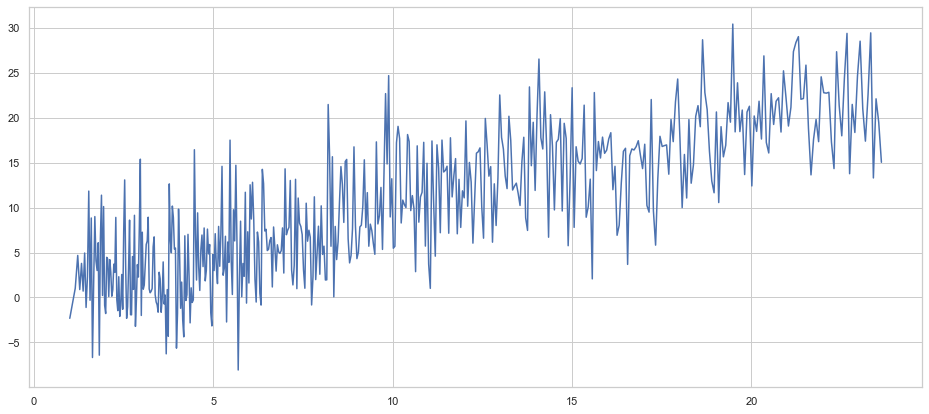

In [3]:
#exponential series to get the trend
ExponentialData = np.exp(axisline**0.5)
t = ExponentialData

#adding normally distributed series in exponential series
y = normalnumbers+ExponentialData 

#plot
plt.figure(figsize=(16,7))
plt.plot(t,y)

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


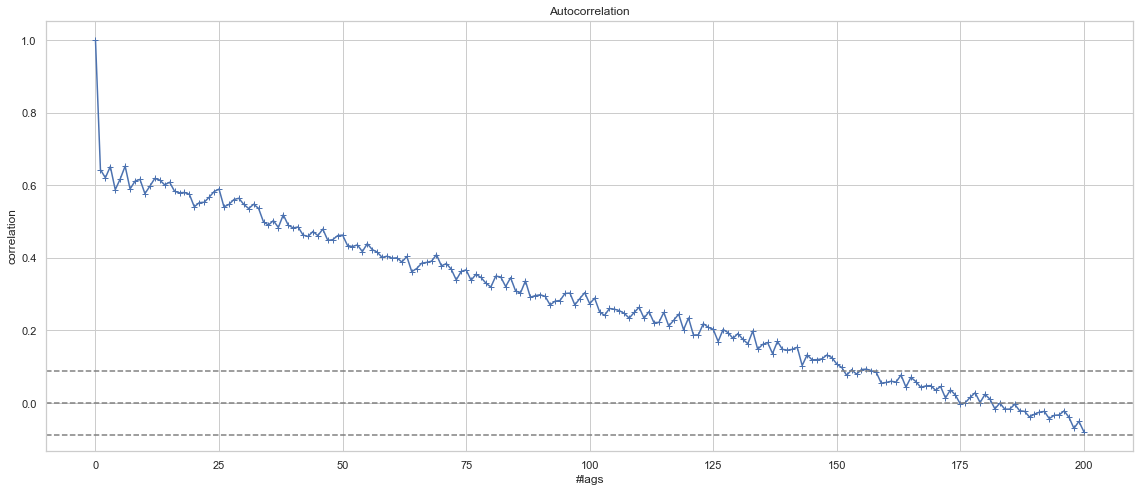

In [4]:
#calling auto correlation function
ACF_lag= acf(y, nlags=200)



#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(ACF_lag,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Autocorrelation')
plt.xlabel('#lags')
plt.ylabel('correlation')
plt.tight_layout()

#Here in X-axis we have Lags and in Y-axis we are having correlation
#The first line we see in plot is 95% Confidience Interval 0f 95% before and above zero '0'
#From the below chart we can observe there is a decent time series correlation of features upto 125 lags,
#This says that that the time series have correlation upto previous 125 lags or time series can be 
#regressed on previous 125 relations.So if we consider all these previous 125 values in our time series 
#model it will lead to a serious multicolinearity problem so we have to limit this lags to avoid 
#multicolinearity by considering limited time series of data so in order to avoid multicolinearity 
#we willbe using PACF

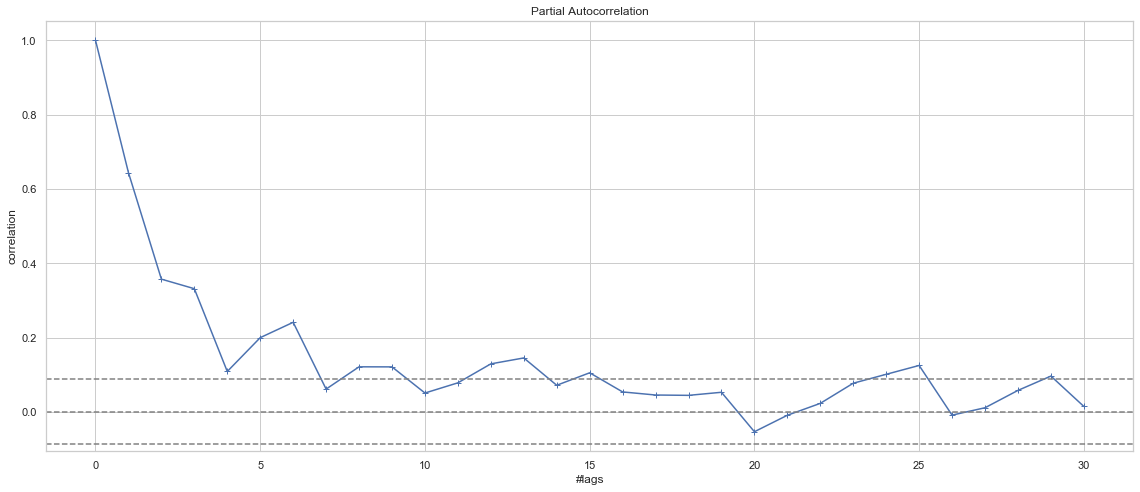

In [5]:
#calling partial correlation function
PACF_lag = pacf(y, nlags=30, method='ols')

#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(PACF_lag,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation')
plt.xlabel('#lags')
plt.ylabel('correlation')
plt.tight_layout()

#We are plotting the same time series data which we have used in the above ACF plotting,here PACF is an
#advanced version of plotting time series data where we can see the plot showing the actual lags which 
#are effecting after removal of noise which help us to remove the multicolinearity problem while doing
#the autoregression.

#From the below plot we can see that the significant amount of correlation value upto 6 or 7.
#Hence in this time series we can say that autoregression model should be of  window 7 AR(7).
#Hence take the lag of time series upto 7-lags and use this value to predict the next time series value.